# 🩺 개인 의료비 예측 프로젝트 (feat. 내 보험료는 얼마?)

### 👥 팀명: 고기4조  
**팀원:** 남태우, 이수정, 이정훈, 정은정, 정재석

---
## 📌 1. 프로젝트 개요

### ✅ 프로젝트 목표
- **개인 관점**: 개인의 의료비 지출을 예측하여 과도한 보험료 납부 방지
- **보험사 관점**: 보험료 변화 추이를 예측하여 맞춤형 보험 상품 개발에 활용

### 🗂 사용 데이터셋
- **Kaggle**의 Medical Cost Personal Datasets
- 출처: [CDC 미국 질병 통제 예방센터](https://www.cdc.gov/)

### 📑 주요 컬럼
| 컬럼명 | 설명 |
|--------|------|
| `age` | 보험 계약자의 나이 |
| `sex` | 성별 (`male`, `female`) |
| `bmi` | 체질량지수 |
| `children` | 건강보험 적용 자녀 수 |
| `smoker` | 흡연 여부 |
| `region` | 거주 지역 (`northeast`, `southeast`, `southwest`, `northwest`) |
| `charges` | 청구된 의료비 |

---

## EDA & 데이터 전처리

In [1]:
import pandas as pd

df = pd.read_csv("./data/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
# 수지형으로 변환
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({
    'northeast': 0,
    'southeast': 1,
    'southwest': 2,
    'northwest': 3
})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


## 변수간 상관계수 분석

아래 히트맵은 의료비(`charges`)와 다른 변수들 간의 **피어슨 상관계수(Pearson Correlation Coefficient)**를 시각화한 것입니다. 상관계수는 -1 ~ 1 사이의 값으로, 변수 간 선형 관계의 강도와 방향을 나타냅니다.

### ✅ 주요 상관관계 요약

| 변수쌍 | 상관계수 | 해석 |
|--------|----------|------|
| `smoker` ↔ `charges` | **0.79** | **매우 강한 양의 상관관계** <br> → 흡연자는 비흡연자보다 평균적으로 의료비가 훨씬 높음 |
| `age` ↔ `charges` | **0.30** | **약한 양의 상관관계** <br> → 나이가 많을수록 의료비가 증가하는 경향 |
| `bmi` ↔ `charges` | **0.20** | **약한 양의 상관관계** <br> → BMI(체질량지수)가 높을수록 의료비가 다소 증가 |

### 📌 분석 요약
- `smoker`는 **의료비 예측에 가장 영향력 있는 변수**입니다.
- `age`, `bmi`도 일정 수준의 설명력을 갖고 있습니다.
- `sex`, `children`, `region`은 상관계수가 낮아, 회귀모델에서 중요한 변수가 아닐 수 있습니다.

> 👉 따라서 모델 설계 시 흡연 여부, 나이, BMI를 **주요 입력 변수**로 고려하는 것이 효과적입니다.


<Axes: >

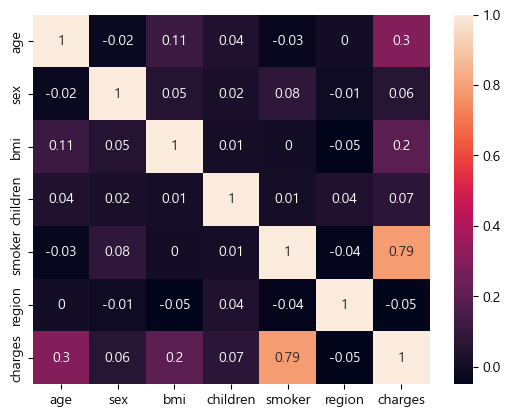

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

corr = df.corr().round(2)
sns.heatmap(data=corr, annot=True)

## Target과 상관관계가 높은 데이터 분포

### **age**

- **20대~50대 연령대**의 가입자가 전체의 다수를 차지하며, 특히 20대와 40대가 가장 많음
- **10대 및 60대**는 상대적으로 적은 비중을 보임
- 이는 실제 보험 상품 수요가 높은 경제활동 연령층(20~50대)에 집중되어 있음을 시사함


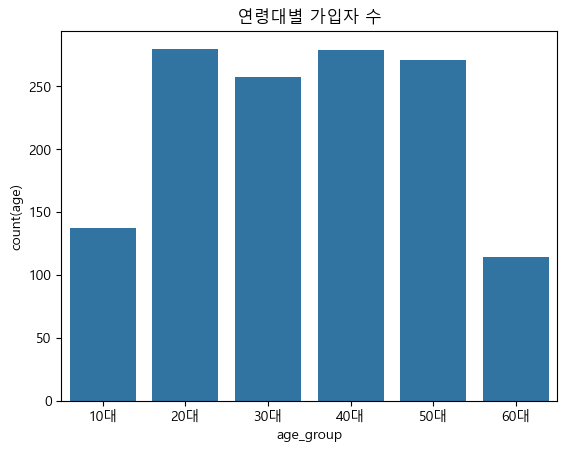

In [6]:
sns.countplot(
    x=pd.cut(df['age'],
            bins=[0, 19, 29, 39, 49, 59, 69],
            labels=['10대', '20대', '30대', '40대', '50대', '60대'])
)
plt.xlabel('age_group')
plt.ylabel('count(age)')
plt.title('연령대별 가입자 수')
plt.show()

### **bmi**

- 대부분의 데이터는 **20 ~ 40 사이**에 분포하며, 특히 **30 전후**에 집중되어 있음
- 이는 일반적인 **정상~과체중 구간**(BMI 기준 18.5~30)에 속하는 사용자가 많다는 것
- **BMI가 40 이상인 고도비만**에 해당하는 사용자는 소수 존재


<Axes: xlabel='bmi', ylabel='Count'>

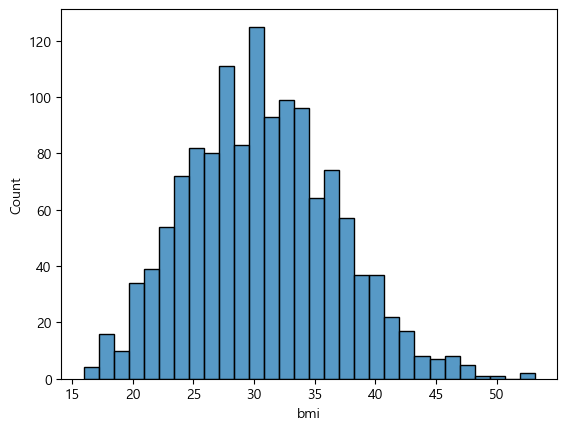

In [7]:
sns.histplot(x='bmi', data=df, bins=30)

### **smoker**

`smoker`는 보험료와 가장 높은 양의 상관관계를 가진 변수로, 의료비 예측에 매우 중요할 것으로 생각됨

- **흡연자(yes)**는 **20.5%**로 비흡연자수에 비해 월등히 적지만, 상관관계를 볼 때 흡연자의 보험료가 **비흡연자보다 현저히 높게 책정**되는 경향을 보임
- **데이터 수는 적지만 영향력은 매우 큼**

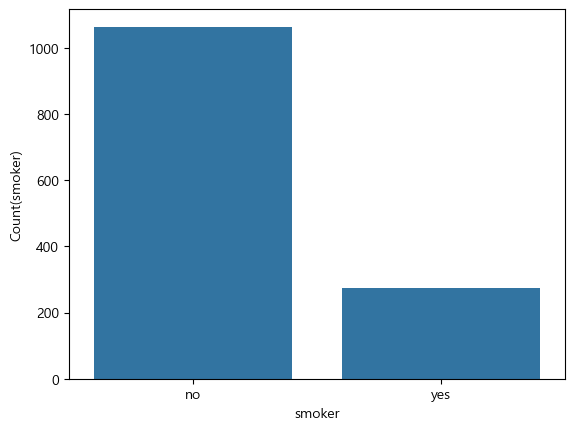

In [8]:
sns.countplot(x=df['smoker'].replace({0: 'no', 1: 'yes'}), order=['no', 'yes'])
plt.xlabel('smoker')
plt.ylabel('Count(smoker)')
plt.show()

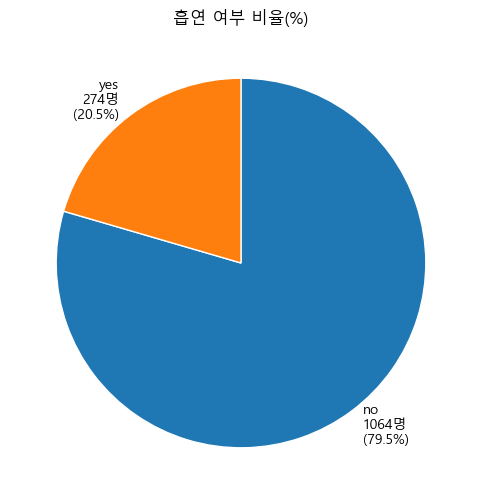

In [9]:
smoker_counts = df['smoker'].replace({0: 'no', 1: 'yes'}).value_counts().reindex(['no', 'yes'])

# 파이 차트 정보 구성
labels = smoker_counts.index
counts = smoker_counts.values
total = counts.sum()
labels_with_pct = [f"{label}\n{count}명\n({count / total:.1%})" for label, count in zip(labels, counts)]

# 파이차트 출력
plt.figure(figsize=(6, 6))
plt.pie(counts,
        labels=labels_with_pct,
        startangle=90,
        counterclock=False,
        wedgeprops={'edgecolor': 'white'})
plt.title('흡연 여부 비율(%)')
plt.show()

이외의 데이터 분포

<Axes: xlabel='age', ylabel='charges'>

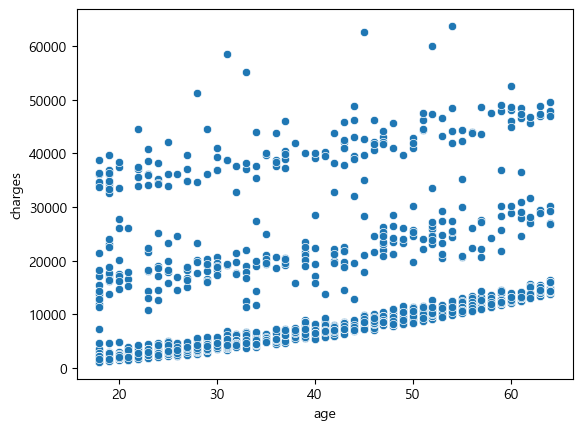

In [10]:
sns.scatterplot(data=df, x='age', y='charges')

<Axes: xlabel='bmi', ylabel='charges'>

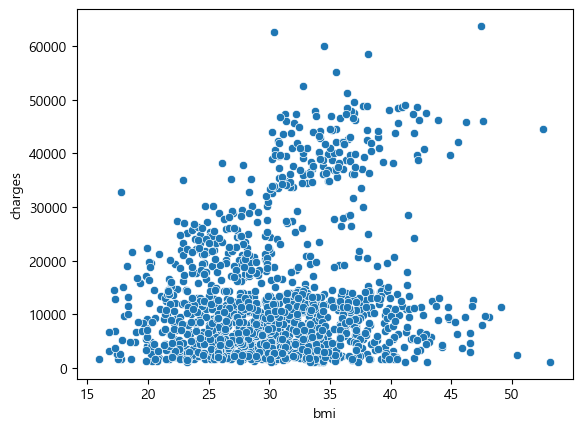

In [11]:
sns.scatterplot(data=df, x='bmi', y='charges')

<Axes: xlabel='sex', ylabel='charges'>

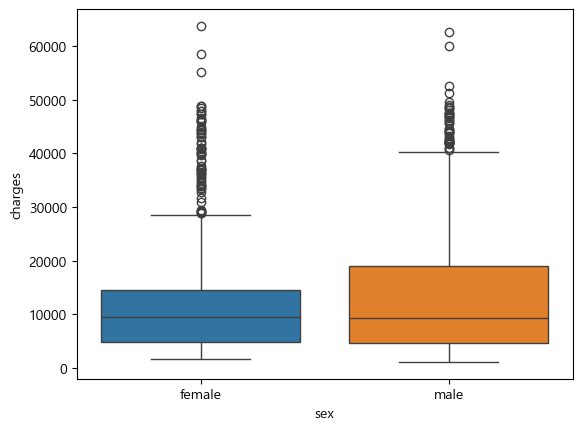

In [23]:
sns.boxplot(
    x=df['sex'].replace({0: 'female', 1: 'male'}),
    y=df['charges'],
    hue=df['sex'].replace({0: 'female', 1: 'male'}),
)

### smoker

- **흡연자(yes)** 의 보험료는 **전반적으로 매우 높음**
  - 중위값(박스의 선)만 봐도 **약 35,000 이상**으로, 비흡연자보다 훨씬 큼
  - 최대값은 약 64,000에 달하며, **상위 이상치가 많이 분포**
- **비흡연자(no)** 는 상대적으로 **보험료가 낮고, 분포도 좁음**
  - 대부분 **5,000 ~ 15,000** 수준에서 형성

<Axes: xlabel='smoker', ylabel='charges'>

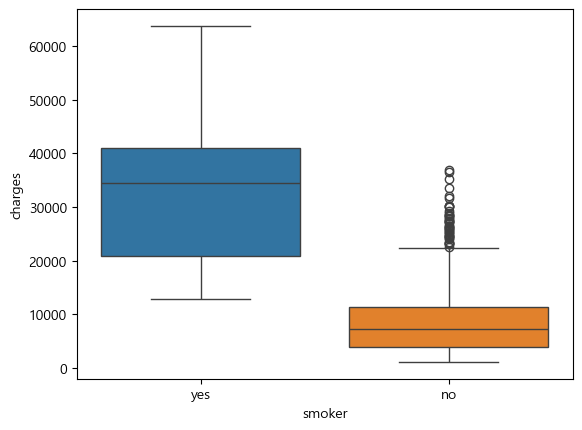

In [26]:
sns.boxplot(
    x=df['smoker'].replace({0: 'no', 1: 'yes'}),
    y=df['charges'],
    hue=df['smoker'].replace({0: 'no', 1: 'yes'}),
)

<Axes: xlabel='age', ylabel='charges'>

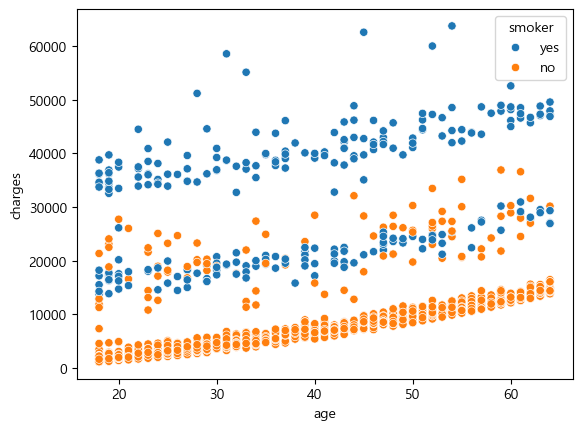

In [27]:
sns.scatterplot(data=df,
                x='age',
                y='charges',
                hue=df['smoker'].replace({0:'no', 1:'yes'}))

- **흡연자 그룹** 은 전반적으로 보험료가 높음, `bmi`가 25~35 이상일때 **보험료가 급격하게 증가**하는 경향을 보임  

- **비흡연자 그룹**은 `bmi`가 높아도 보험료 상승이 완만  

- **BMI가 30이상이고 흡연자인 경우** 즉, 과체중이상 이면서 흡연자인 경우 보험료가 높게 책정됨


<Axes: xlabel='bmi', ylabel='charges'>

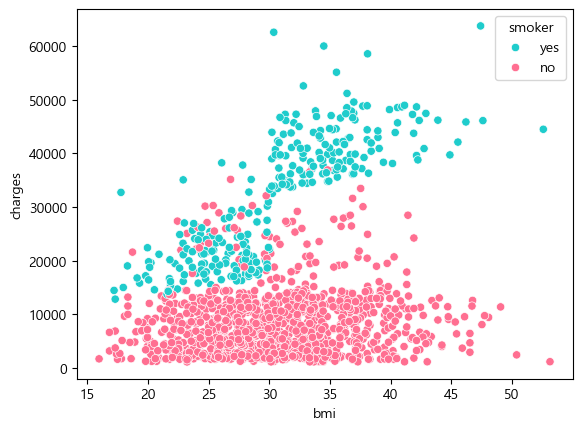

In [30]:
sns.scatterplot(data=df,
                x='bmi',
                y='charges',
                hue=df['smoker'].replace({0: 'no', 1: 'yes'}),
                palette={'yes': '#1fcccc', 'no': '#ff6f91'})


- **나이가 증가할수록 보험료도 전반적으로 증가**하는 경향이 뚜렷하게 나타남  
  → 특히 **비흡연자**는 이 경향이 **더 일관되고 선형적**임
- **흡연자(yes)**는 전체적으로 **높은 위치에 분포**하며, **보험료가 비흡연자보다 평균적으로 월등히 높음**
- 동일한 나이에서도 **흡연 여부에 따라 보험료 격차가 상당히 큼**
  - 예: 40세 기준 흡연자는 평균 3~4만 이상, 비흡연자는 1만~2만 수준
- **고령의 흡연자**는 특히 고비용 청구 사례가 집중적으로 분포

<Axes: xlabel='age', ylabel='charges'>

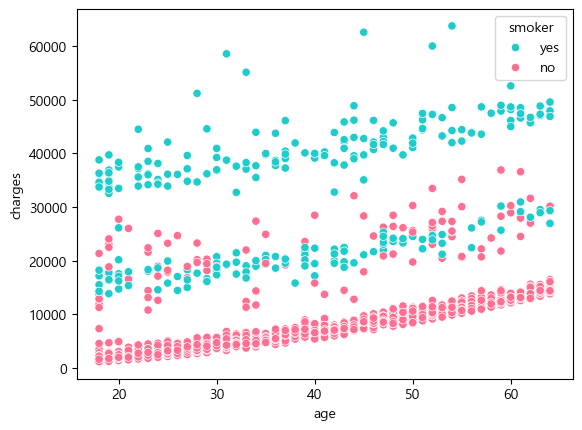

In [32]:
sns.scatterplot(data=df,
                x='age',
                y='charges',
                hue=df['smoker'].replace({0: 'no', 1: 'yes'}),
                palette={'yes': '#1fcccc', 'no': '#ff6f91'}                )

#### 모델 성능

- **R-squared (결정계수): 0.750**
  - 전체 보험료의 약 **75%를 설명할 수 있는 수준**으로, 선형회귀 모델로서는 우수한 설명력을 보임
- **Adj. R-squared (수정된 결정계수): 0.749**
  - 변수 수를 고려한 조정 R²도 높게 유지되어 **과적합 우려가 낮음**

---
#### 유의미한 변수(P-value < 0.05)

| 변수     | 계수 (coef) | 해석 |
|----------|-------------|------|
| `age`    | +257.78     | 나이가 1세 증가할수록 보험료는 **약 258달러 상승** |
| `bmi`    | +321.38     | BMI가 1 증가할수록 보험료는 **약 321달러 상승** |
| `children` | +477.79  | 자녀 수가 많을수록 보험료도 증가 |
| `smoker` | +23818.00   | 흡연자는 비흡연자보다 보험료가 **평균 약 2.4만 달러 더 높음** |

---

#### 통계적으로 유의하지 않은 변수 (P-value > 0.05)

| 변수     | P-value |
|----------|---------|
| `sex`    | 0.698   |
| `region` | 0.515   |

- `sex`와 `region`은 보험료 예측에 **유의한 영향을 미치지 않음** → 모델 단순화를 위해 제외 가능

#### 종합 해석

- **`age`, `bmi`, `smoker`**는 보험료(`charges`) 예측에 있어 **가장 영향력이 큰 변수**로 나타났으며,
- 특히 **흡연 여부**는 단일 변수 중 **가장 큰 계수값을 가지며**, 보험료 차이에 압도적 영향을 미침
- 이 모델은 보험사 입장에서 **고위험 고객을 판별**하고, 맞춤형 보험 상품을 설계하는 데 매우 유용하게 활용될 수 있음

In [35]:
import statsmodels.api as sm
# import statsmodels.formula.api as smf

X = df.drop('charges', axis = 1)
y = df['charges']
#변수들에 상수항을 추가함.
X_constant = sm.add_constant(X) 

####요약 통계량 OLS 방법 ->R^2을 이용해도 됨.
model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()


lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     664.8
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:57:12   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.188e+04    988.028    -12.023      0.000   -1.38e+04   -9940.607
age          257.7804     11.907     21.650      0.000     234.423     281.138
sex         -129.5026    333.435     -0.388      0.698    -783.618     524.613
bmi          321.3813     27.466     11.701      0.000     267.500     375.263
children     477.7866    137.983      3.463      0.001     207.099     748.474
smoker      2.381e+04    413.007     57.654      0.000     2.3e+04    2.46e+04
region       -98.2718    150.749     -0.652      0.515    -394.003     197.459
==============================================================================
Omnibus:                      301.228   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.385
Skew:                           1.214   Prob(JB):                    1.37e-157
Kurtosis:                       5.658   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""